In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [12]:
#Selection of quantitative variables from the Douro and Tejo sites
df = pd.read_csv('EFIplus_medit.csv', delimiter=";")
df = df.dropna()
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
data_sites = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]
data_numeric = data_sites[variables].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

<ipython-input-13-779adde21d68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sites['Cluster_' + method] = clustering.fit_predict(data_scaled)
<ipython-input-13-779adde21d68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sites['Cluster_' + method] = clustering.fit_predict(data_scaled)
<ipython-input-13-779adde21d68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

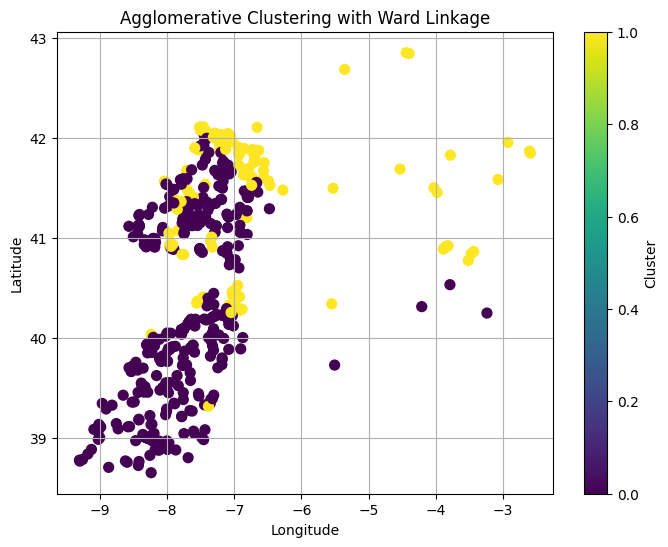

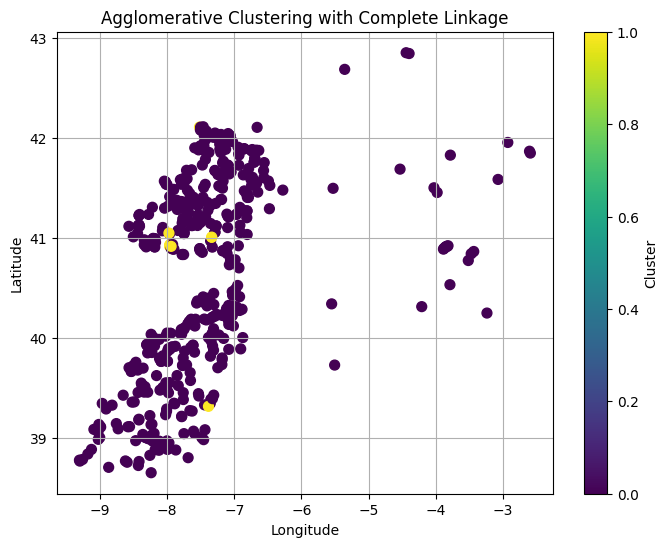

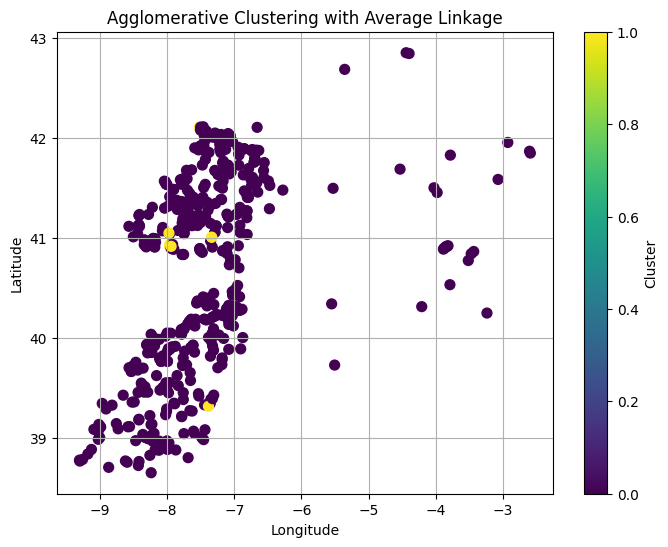

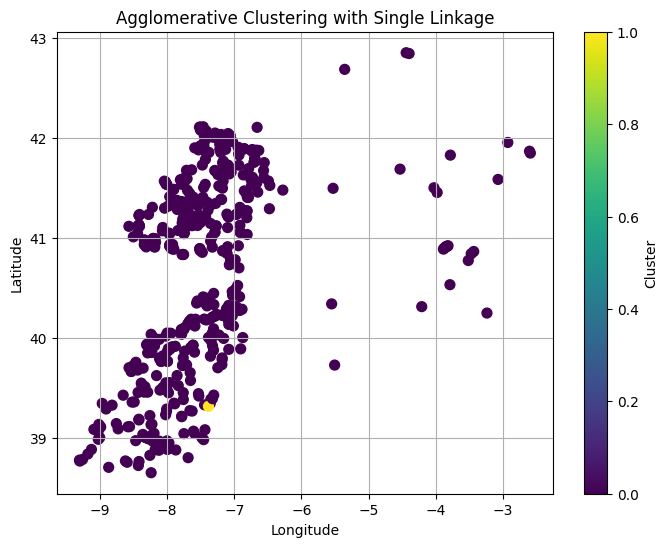

In [13]:
# Perform agglomerative clustering using different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    data_sites['Cluster_' + method] = clustering.fit_predict(data_scaled)

# Visualize the clustering results for each linkage method
for method in linkage_methods:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_sites['Longitude'], data_sites['Latitude'], c=data_sites['Cluster_' + method], cmap='viridis', s=50)
    plt.title('Agglomerative Clustering with ' + method.capitalize() + ' Linkage')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

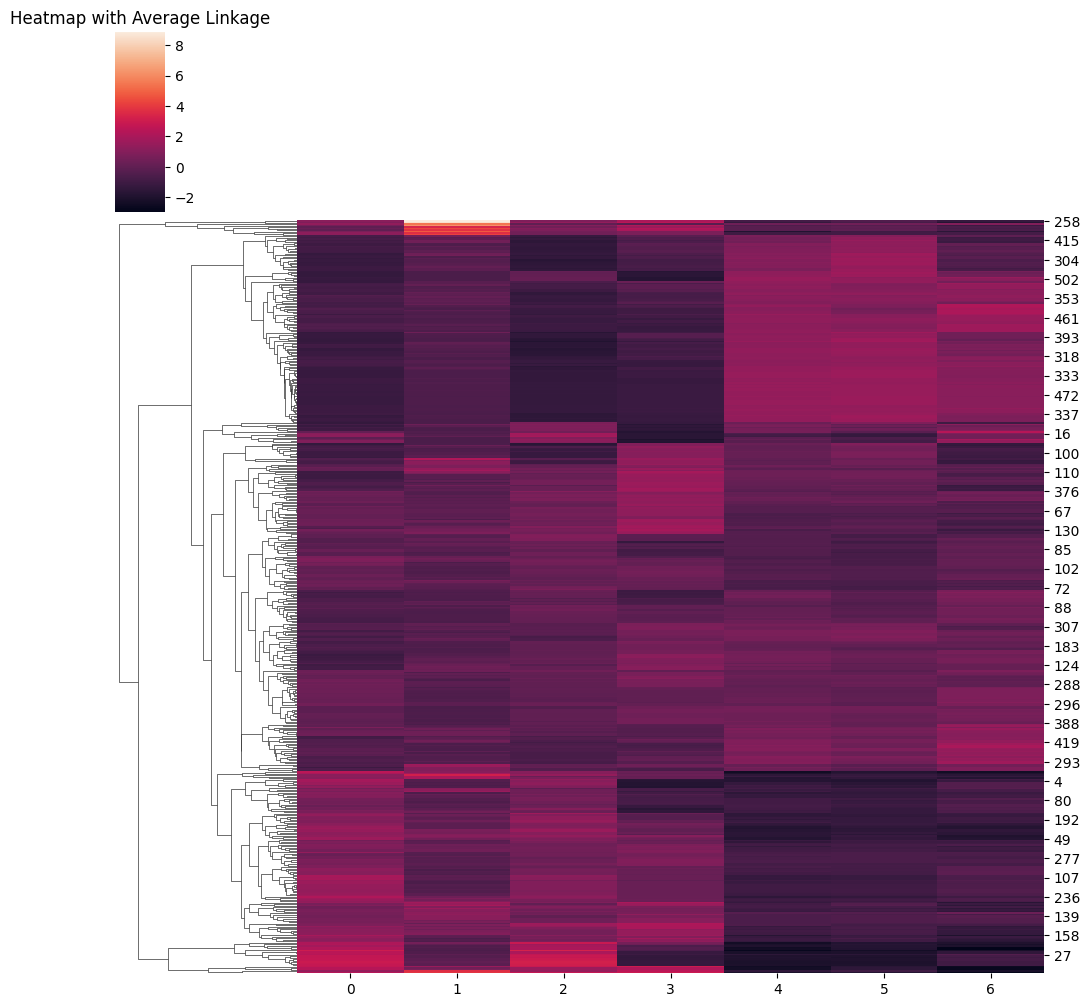

In [14]:
plt.figure(figsize=(10, 8))
sns.clustermap(data_scaled, method='average',  row_cluster=True, col_cluster=False)
plt.title("Heatmap with Average Linkage")
plt.show()

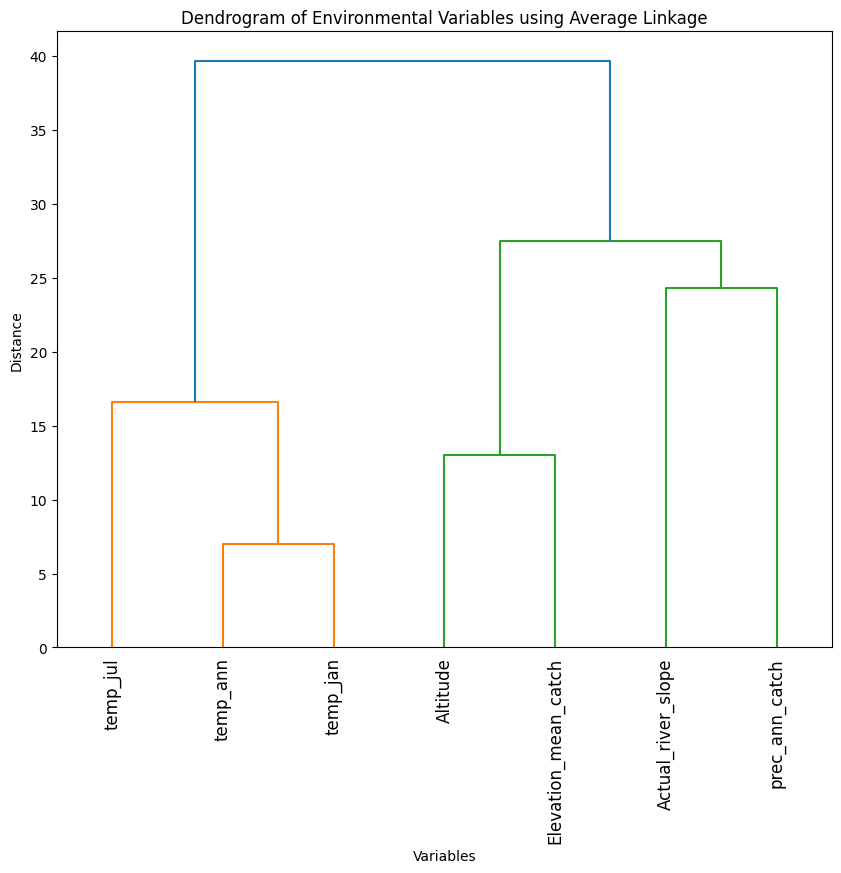

In [15]:
plt.figure(figsize=(10, 8))
Z = linkage(data_scaled.T, method='average')
dendrogram(Z, labels=variables)
plt.title("Dendrogram of Environmental Variables using Average Linkage")
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.xticks(rotation='vertical')
plt.show()